<a href="https://colab.research.google.com/github/Leviathanxxz/tugas-AI-tupan/blob/main/KLASIFIKASI_KESEHATAN_TANAMAN_TOMAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
# Load data
data = pd.read_csv("/content/tomato_disease.csv")
data.head(len(data))

,Unnamed: 0,Leaf_Spot_Size,Leaf_Color_Index,Temperature,Humidity,Disease
0,0,5.496714,54.630888,24.798711,63.891805,Diseased
1,1,4.861736,59.547083,23.849267,57.244071,Diseased
2,2,5.647689,43.007162,22.119261,55.909006,Healthy
3,3,6.523030,52.814846,20.706126,59.983128,Diseased
4,4,4.765847,46.746787,23.396447,59.149077,Diseased
...,...,...,...,...,...,...
495,495,5.538910,48.594499,26.012186,65.350751,Diseased
496,496,3.962754,58.988433,26.123007,59.867394,Diseased
497,497,4.809661,53.204214,24.416732,55.590627,Diseased
498,498,4.124382,47.144105,24.048125,59.184665,Diseased


In [ ]:
#Pembersihan data dan menampilkan data info
data.drop(columns="Unnamed: 0",inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Leaf_Spot_Size    500 non-null    float64
 1   Leaf_Color_Index  500 non-null    float64
 2   Temperature       500 non-null    float64
 3   Humidity          500 non-null    float64
 4   Disease           500 non-null    object 
dtypes: float64(4), object(1)
memory usage: 19.7+ KB


In [ ]:
# Mengubah data ke bahasa indonesia
data.rename(columns={
    'Leaf_Spot_Size':'ukuran_bercak_daun(cm²)',
    'Leaf_Color_Index':'indeks_warna',
    'Temperature':'suhu(°C)',
    'Humidity':'kelembapan_udara(%)',
    'Disease':'status_kesehatan'
},inplace=True)

data['status_kesehatan'] = data['status_kesehatan'].replace({
    'Diseased': 'Sakit',
    'Healthy': 'Sehat'
})
data.head()

,ukuran_bercak_daun(cm²),indeks_warna,suhu(°C),kelembapan_udara(%),status_kesehatan
0,5.496714,54.630888,24.798711,63.891805,Sakit
1,4.861736,59.547083,23.849267,57.244071,Sakit
2,5.647689,43.007162,22.119261,55.909006,Sehat
3,6.523030,52.814846,20.706126,59.983128,Sakit
4,4.765847,46.746787,23.396447,59.149077,Sakit


In [ ]:
# Menamppilkan jumlah data null dan duplikat
print("data null:\n",data.isnull().sum())
print("-"*40)
print("duplikat:\n",data.duplicated().sum())

data null:
 Unnamed: 0          0
Leaf_Spot_Size      0
Leaf_Color_Index    0
Temperature         0
Humidity            0
Disease             0
dtype: int64
----------------------------------------
duplikat:
 0


In [ ]:
# melihat data target
for col in data.select_dtypes(include=['object']).columns:
    print(data[col].unique())

['Sakit' 'Sehat']


In [ ]:
#Encode data string ke angka
encoders = {}

for col in data.select_dtypes(include=['object']).columns:
    label_enc = LabelEncoder()
    data[col] = label_enc.fit_transform(data[col])
    encoders[col] = label_enc
data.head()

,ukuran_bercak_daun(cm²),indeks_warna,suhu(°C),kelembapan_udara(%),status_kesehatan
0,5.496714,54.630888,24.798711,63.891805,0
1,4.861736,59.547083,23.849267,57.244071,0
2,5.647689,43.007162,22.119261,55.909006,1
3,6.523030,52.814846,20.706126,59.983128,0
4,4.765847,46.746787,23.396447,59.149077,0


In [ ]:
 # deskripsi data
round(data.describe(),2)

,ukuran_bercak_daun(cm²),indeks_warna,suhu(°C),kelembapan_udara(%),status_kesehatan
count,500.00,500.00,500.00,500.00,500.00
mean,5.01,50.16,22.22,60.17,0.13
std,0.98,4.89,2.02,4.92,0.33
min,1.76,36.52,16.21,45.30,0.00
25%,4.30,47.02,20.80,56.94,0.00
50%,5.01,50.14,22.24,59.96,0.00
75%,5.64,53.26,23.51,63.50,0.00
max,8.85,63.16,27.20,75.97,1.00


In [ ]:
# Melihat encode
for col,label_enc in encoders.items():
    print(f"mapping untuk kolom {col}:")
    print(dict(zip(label_enc.classes_,label_enc.transform(label_enc.classes_))))
    print("-"*40)

mapping untuk kolom status_kesehatan:
{'Sakit': np.int64(0), 'Sehat': np.int64(1)}
----------------------------------------


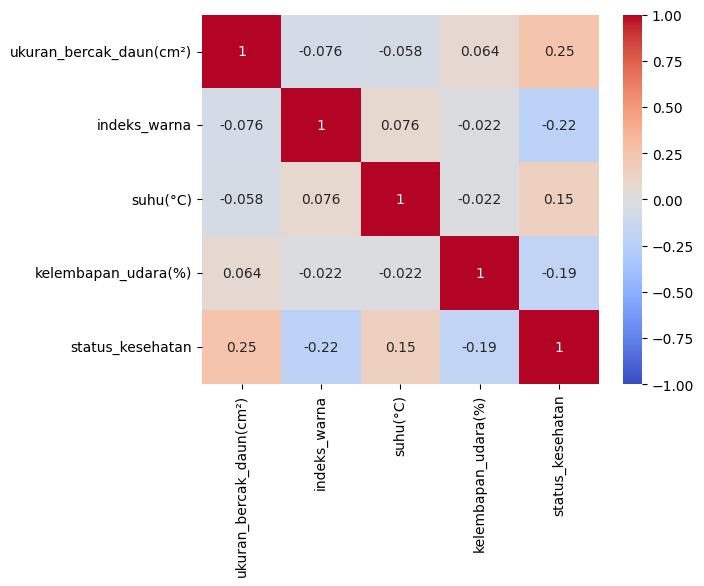

In [ ]:
#heatmap data plant disease k
datacorr = data.corr()
heatmap = sns.heatmap(datacorr,vmax=1,vmin=-1,center=0,cmap="coolwarm",annot=True)


In [ ]:
# Pisahkan fitur dengan label
X = data.drop(columns="status_kesehatan")
y = data["status_kesehatan"]

In [ ]:
# Bagi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,shuffle=True)

In [ ]:
# Buat model dan latih model
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Cek accuracy train dan test untuk mengetahui overfiting,underfiting atau goodfiting data train dan test
train_acc = accuracy_score(y_train,model.predict(X_train))
test_acc = accuracy_score(y_test,model.predict(X_test))
print(f'Akurasi data train : {train_acc:.2%}')
print(f'Akurasi data test : {test_acc:.2%}')
print("-"*40)
GAP = train_acc - test_acc
print(f'Selisih akurasi data train dan test : {GAP:.2%}')

Akurasi data train : 100.00%
Akurasi data test : 98.00%
----------------------------------------
Selisih akurasi data train dan test : 2.00%


In [ ]:
# Prediksi
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi hasil
print("Akurasi model",accuracy_score(y_test, y_pred))
print("\nLaporan klasifikasi\n",classification_report(y_test, y_pred))

Akurasi model 0.98

Laporan klasifikasi
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        82
           1       1.00      0.89      0.94        18

    accuracy                           0.98       100
   macro avg       0.99      0.94      0.96       100
weighted avg       0.98      0.98      0.98       100



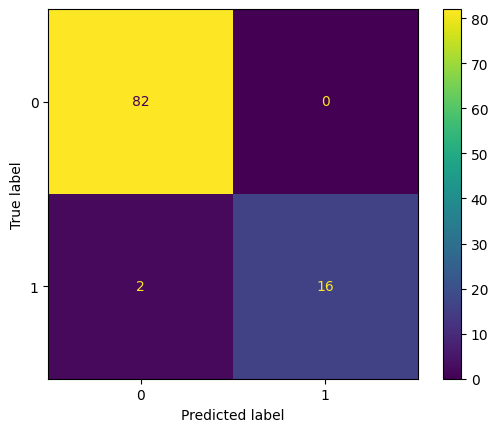

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
# Pembulatan data angka decimal(float)
for col in data.drop(columns=['status_kesehatan']).columns:
  data[col] = data[col].round(2)

data.head()

,ukuran_bercak_daun(cm²),indeks_warna,suhu(°C),kelembapan_udara(%),status_kesehatan
0,5.50,54.63,24.80,63.89,0
1,4.86,59.55,23.85,57.24,0
2,5.65,43.01,22.12,55.91,1
3,6.52,52.81,20.71,59.98,0
4,4.77,46.75,23.40,59.15,0


In [ ]:
# pengujian dengan algoritma lain (logistic regression)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pr = model.predict(X_test)

In [ ]:
print("Akurasi model",accuracy_score(y_test, y_pr))
print("\nLaporan klasifikasi\n",classification_report(y_test, y_pr))

Akurasi model 0.86

Laporan klasifikasi
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        82
           1       0.70      0.39      0.50        18

    accuracy                           0.86       100
   macro avg       0.79      0.68      0.71       100
weighted avg       0.85      0.86      0.84       100



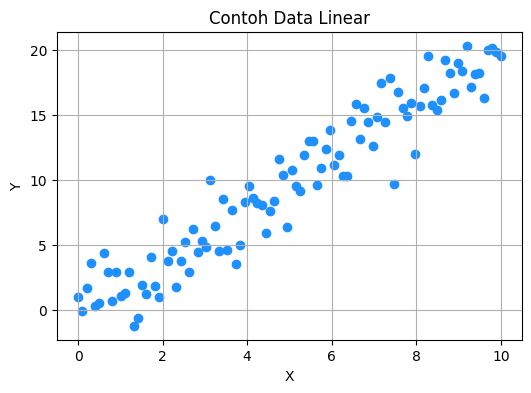

In [ ]:
# contoh plot data linear
import matplotlib.pyplot as plt
import numpy as np

# Membuat data linear
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2 * x + np.random.randn(100) * 2  # hubungan linear dengan sedikit noise

# Plot scatter
plt.figure(figsize=(6,4))
plt.scatter(x, y, color='dodgerblue')
plt.title("Contoh Data Linear")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()